# 04.01 - Data Import & Review & Cleaning
+ Imports & Setup
+ Data Review
 + Data Definition (shape, data types, description of the columns)
 + Count or percent per unique values
 + The range of values
 + Visual Inspection (missing values pct, target variables pct) 
 + Verify Data Integrity (is this one necessary?)
+ Data Cleaning
 + Missing Value Imputation
 + Duplicated Value Cleaning
 + Categorical Feature Encoding
 + Feature Grouping

## Imports & Setup

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# not sure if I should show this one ?
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone')

/Users/liuyang/Desktop/Springboard_Capstone/notebooks


## Data Review

### Data shape

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
df.shape

(18359, 14)

### Column Names and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

### Count of unique values

In [7]:
# Count of unique values in each column
df.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [8]:
# Percentage of unique values in each column 
pct = df.nunique()/df.shape[0]*100
pct = pct.apply(lambda x:"{:.4}%".format(x))
pct = pd.DataFrame(pct, columns=['percentage'])
pct

,percentage
enrollee_id,100.0%
city,0.67%
city_development_index,0.5066%
gender,0.01634%
relevent_experience,0.01089%
enrolled_university,0.01634%
education_level,0.02723%
major_discipline,0.03268%
experience,0.1198%
company_size,0.04358%


### Range of values per column

In [9]:
df.agg([min,max]).T

,min,max
enrollee_id,1,33380
city,city_1,city_99
city_development_index,0.448,0.949
relevent_experience,Has relevent experience,No relevent experience
training_hours,1,336
target,0,1


In [10]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Visual Inspection

#### Missing values

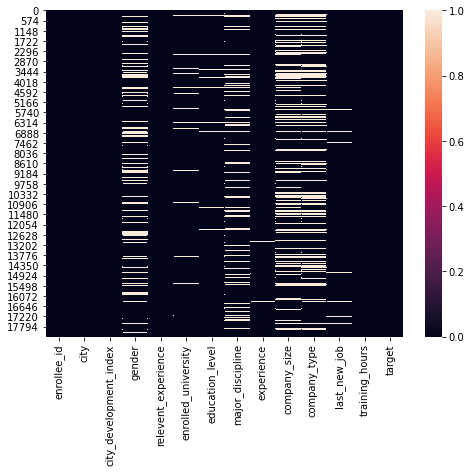

In [11]:
# Visualize patterns of missing values in the dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=True)
plt.show()

In [12]:
# Check the percentage of minssing values for each columns
nan_p = round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)
nan_p = nan_p.apply(lambda x:"{:.4}%".format(x))
nan_p = pd.DataFrame(nan_p,columns=['percent'])
nan_p

,percent
company_type,27.45%
company_size,26.03%
gender,22.32%
major_discipline,15.46%
education_level,2.49%
last_new_job,2.0%
enrolled_university,1.86%
experience,0.32%
target,0.0%
training_hours,0.0%


#### The target percentage

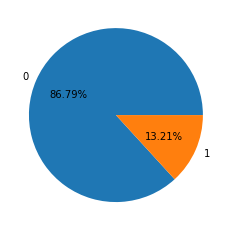

In [13]:
# Calculating target percentage. enrollee who is open to a new employment is labeled as 1. 
plt.pie(df.target.value_counts(), labels=df.target.unique(),autopct = '%.2f%%')
#plt.style.use('fivethirtyeight')
plt.show()

## Data Cleaning

### Missing Value Imputation

#### Check columns that has missing values.

In [14]:
df.isnull().sum().sort_values(ascending=False)

company_type              5039
company_size              4779
gender                    4098
major_discipline          2838
education_level            457
last_new_job               367
enrolled_university        342
experience                  59
target                       0
training_hours               0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [15]:
# Check the unique value of column 'company_type'
df['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', nan,
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

In [16]:
# check the percentage of each value in column 'company_type', including the missing values
df['company_type'].value_counts(dropna=False) /(len(df['company_type']))*100

Pvt Ltd                54.746991
NaN                    27.447029
Funded Startup          5.653903
Public Sector           5.425132
Early Stage Startup     3.170107
NGO                     2.908655
Other                   0.648183
Name: company_type, dtype: float64

#### As we can see 'Pvt Ltd' is the most common value, therefore we will fill the missing value with 'Pvt Ltd' 

In [17]:
df['company_type'].fillna('Pvt Ltd',inplace = True)

In [18]:
# Check again, make sure there's no more missing values 
df['company_type'].value_counts(dropna=False)

Pvt Ltd                15090
Funded Startup          1038
Public Sector            996
Early Stage Startup      582
NGO                      534
Other                    119
Name: company_type, dtype: int64

In [19]:
# Check the unique value of column 'company_size'
df['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

#### We can see some of the value is not correctly input, therefore we need to replace them with the right value

In [20]:
# Replace '10/49' with '10-49', replace'100-500' with '100-499' 
df.loc[df['company_size'] == '10/49', 'company_size']='10-49'
df.loc[df['company_size'] == '100-500', 'company_size'] = '100-499'

In [21]:
# check the percentage of each value in 'company_type', including the na values
df['company_size'].value_counts(dropna=False)/len(df['company_size'])*100

NaN          26.030830
50-99        16.994390
100-499      14.695790
10000+       11.133504
10-49         7.985184
1000-4999     7.620241
<10           7.407811
500-999       4.913122
5000-9999     3.219130
Name: company_size, dtype: float64

In [22]:
# Check the percentage of each value in 'company_type' without missing values. 
df['company_size'].value_counts()/(len(df['company_size'])-df['company_size'].isnull().sum())*100

50-99        22.974963
100-499      19.867452
10000+       15.051546
10-49        10.795287
1000-4999    10.301915
<10          10.014728
500-999       6.642121
5000-9999     4.351988
Name: company_size, dtype: float64

In [23]:
# Want to fill the missing value with multiple values based on those values' percentage, but don't know how to do it
# also don't know if it's necessary
# so I fill the missing value with the most common value '50-99'
df['company_size'].fillna('50-99',inplace=True)

In [24]:
# Make sure there's no more missing values 
df['company_size'].value_counts(dropna=False)

50-99        7899
100-499      2698
10000+       2044
10-49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

#### Once again, we check the columns that have missing values 

In [25]:
df.isnull().sum().sort_values(ascending=False)

gender                    4098
major_discipline          2838
education_level            457
last_new_job               367
enrolled_university        342
experience                  59
target                       0
training_hours               0
company_type                 0
company_size                 0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

#### Fill the rest of the columns have missing values with the same method(fill na value with mode())

In [26]:
# Filter out the rest of the columns that has na values, and fill it with mode value of each column
na_col = ['gender','major_discipline','education_level','last_new_job','enrolled_university','experience']
for i in na_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [27]:
# Make sure there's no more na values in the dataset.
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Duplicated Value Cleaning

In [28]:
# Check duplicate values
df[df.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


#### We can see there's no duplicated value

### Categorical Feature Encoding and Feature Grouping

#### First filter out all the categorical columns

In [29]:
# Filter out all the categorical columns
df.select_dtypes(include=['object']).columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [30]:
# Check the unique value and length of column 'city' 
print(df['city'].unique())
print('The length is: ',len(df['city'].unique()))

['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157' 'city_111'
 'city_78' 'city_80' 'city_33' 'city_7' 'city_72

In [31]:
# Check the value of column 'gender'
df['gender'].value_counts()

Male      16982
Female     1188
Other       189
Name: gender, dtype: int64

In [32]:
# Check the value of colum 'major_displine'
df['major_discipline'].value_counts()

STEM               16576
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [33]:
# Check the value of column 'company_type'
df['company_type'].value_counts()

Pvt Ltd                15090
Funded Startup          1038
Public Sector            996
Early Stage Startup      582
NGO                      534
Other                    119
Name: company_type, dtype: int64

#### After exploring the values of 'city', 'gender', 'major_discipline', 'company_type', 
#### we decide to encode these columns with dummy encoding.

In [34]:
# Encode column 'city', 'gender', 'major_discipline', 'company_type' with dummy encoding
encoded_col = pd.get_dummies(df[['city', 'gender', 'major_discipline', 'company_type']])
df = df.join(encoded_col).drop(['city', 'gender', 'major_discipline', 'company_type'],axis=1)

In [35]:
# Check the data shape after dummy encoding
df.shape

(18359, 148)

#### Now we take a look at the rest of the categorical columns

In [36]:
df.select_dtypes(include=['object']).columns

Index(['relevent_experience', 'enrolled_university', 'education_level',
       'experience', 'company_size', 'last_new_job'],
      dtype='object')

In [37]:
# Check the value of column 'relevant_experience'
df['relevent_experience'].value_counts()

Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64

In [38]:
# Encode 'relevent_experience' by manually mapping it with value 0, 1. 
# Label 'No relevent experience' as 0, 'Has relevent experience' as 1.
df['relevent_experience'] = df['relevent_experience'].replace({'Has relevent experience':1,'No relevent experience':0})

In [39]:
# Check the value of column 'enrolled_university'
df['enrolled_university'].value_counts()

no_enrollment       14001
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [40]:
# Encode 'enrolled_university' by manually mapping it with value 0, 1. 
# Label 'No_enrollment' as 0, label the rest value as 1.
df['enrolled_university'] = df['enrolled_university'].replace({'no_enrollment':0, 'Full time course':1, 'Part time course':1})

In [41]:
# Check the value of column 'educational_level'
df['education_level'].value_counts()

Graduate          11226
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [42]:
# Encode 'education_level' by manually mapping it with value 0, 1. 
# Label 'High School' and 'Primary Scholl' as 0, label the rest value as 1.
df['education_level'] = df['education_level'].replace({'Graduate':1, 'Masters':1, 'Phd':1, 'High School':0, 'Primary School':0})

In [43]:
# Check the value of column 'company_size'
df['company_size'].value_counts()

50-99        7899
100-499      2698
10000+       2044
10-49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [44]:
# Encode 'company_size' by manually mapping it with value 1, 2, 3: 
# Employee size smaller than 100 is labeled as 1 (small), 
# Employee size smaller than 1000 is labeled as 2 (medium),
# Employee size bigger than 1000 is labeled as 3 (large).
df['company_size'] = df['company_size'].replace({'<10':1, '10-49':1, '50-99':1, '100-499':2, '500-999':2, '1000-4999':3, '5000-9999':3, '10000+':3})

In [45]:
# Check the value of column 'last_new_job' (difference in years between previous job and current job)
df['last_new_job'].value_counts()

1        7934
>4       3339
2        2835
never    2186
4        1038
3        1027
Name: last_new_job, dtype: int64

In [46]:
# Encode 'last_new_job' by manually mapping it with value 0, 1.
# Label 'never'(never change job) as 0, Label the rest value as 1.
df['last_new_job'] = df['last_new_job'].replace({'never':0, '1':1, '2':1, '3':1, '4':1, '>4':1})

In [47]:
# Check the value of column 'experience' (total working experience in years)
df['experience'].value_counts()

>20    3496
5      1309
4      1250
3      1159
6      1125
2       992
9       979
10      967
7       950
8       755
15      695
11      667
14      602
16      549
12      497
1       452
<1      416
13      412
17      347
19      308
18      286
20      146
Name: experience, dtype: int64

#### As this column has more unique values, we will need to group the values first and encode them.
#### To make it easy to group, we can first, replace value '>20' and '<1' with value '21' and '0' .

In [48]:
# Replace '<1' with '0', replace '>20' with '21'. 
df.loc[df['experience'] == '<1', 'experience']='0'
df.loc[df['experience'] == '>20', 'experience']='21'

In [49]:
# Convert all the value(str) to int. 
df.experience = df.experience.astype(int)

#### If there is '>' or '<' in the value we won't be able to convert them to int. 
#### Therefore we replaced values that contain '>' or '<' in cell48.

In [50]:
# Check the data type again. Make sure it's all int now.
df['experience'].dtypes

dtype('int64')

In [51]:
# Check the unique value of work experience
sorted(df['experience'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

#### We can see the values range from 0 to 21, which 0 represents less than 1 year experience, 
#### 21 represents more than 20 years experience.

In [52]:
# Then we group experience 0, 1 year as level 1 (entry level)
df.loc[(df['experience']== 0) | (df['experience']== 1), 'experience']= 1

In [53]:
# Group experience 2,3,4 years as level 2 (junior)
df.loc[(df['experience']== 2) | (df['experience']== 3) | (df['experience']== 4), 'experience']= 2

In [54]:
# Group experience 5,6,7,8 years as level 3 (senior)
df.loc[(df['experience']== 5) | (df['experience']== 6) | (df['experience']== 7) | (df['experience']== 8),'experience']= 3

In [55]:
# Group experience that are equal or longer than 9 years as level 4 (expert)
df.loc[df['experience'] >= 9, 'experience'] = 4

#### Check our dataset after the cleaning.

In [56]:
pd.set_option('display.max_columns', None)  
df.head()

,enrollee_id,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Female,gender_Male,gender_Other,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,23798,0.689,1,0,1,2,2,1,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,29166,0.923,1,0,1,4,1,1,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,46,0.910,1,0,1,3,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,18527,0.666,1,0,1,4,1,1,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,21751,0.887,0,0,1,3,1,1,88,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [57]:
# Check the shape of the data
df.shape

(18359, 148)

In [58]:
# Check data type of all the columns, make sure there's no more 'object' 
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [59]:
# Drop the first column 'enrollee_id'
df = df.drop('enrollee_id', axis=1)

In [60]:
df.describe()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Female,gender_Male,gender_Other,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
count,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.00000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000,18359.000000